# Building and optimizing the geometry of a molecule

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [2]:
import cPickle as pickle

In [3]:
ibuH = pickle.load(open('ibuH.pkl','rb'))

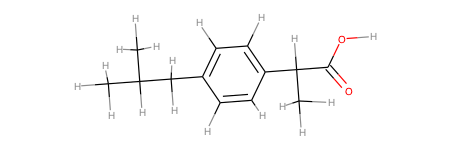

In [4]:
ibuH

Let's take another look at a text representation of the molecule:

In [5]:
print Chem.MolToMolBlock(ibuH)


     RDKit          

 33 33  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

The first three columns in the atom block of this output are the x, y, and z coordinates of each atom. They haven't been created yet!

In [6]:
AllChem.EmbedMolecule(ibuH)

0

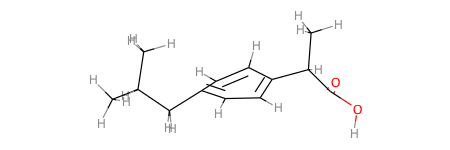

In [7]:
ibuH

The explicit-hydrogen pseudo-3D line drawings can look a bit odd for all but the smallest molecules. 

## Pymol integration for 3D visualization

There are a few alternative methods for 3D visualization. If you are already familiar with PyMOL, a very convenient method is to connect RDKit to a running instance of PyMOL, using a communication protocol called `xmlrpc`. You need to start PyMOL using a special option to start the xmlrpc server, which on my Mac looks like this:

`/Applications/MacPyMOL.app/Contents/MacOS/MacPyMOL -R`

We then can import the PyMOL communication into our notebook:

In [8]:
from rdkit.Chem import PyMol

In [9]:
v = PyMol.MolViewer()

In [10]:
v.ShowMol(ibuH);

If you switch over to your copy of PyMOL, you should now see a 3D representation of the molecule that you can manipulate using the typical methods. We probably notice that the aromatic ring is not flat as expected. We can save our view by importing a png back into the notebook:

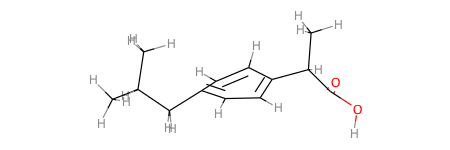

In [11]:
ibuH

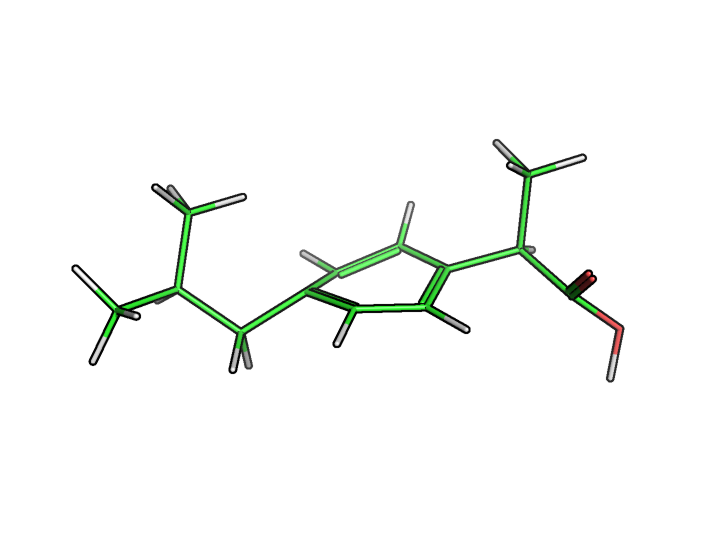

In [13]:
v.server.do('ray')
v.GetPNG()

## Force-field optimization of a molecular geometry

In the picture above, it is clear that our molecular geometry isn't correct. We expect the aromatic benzene ring to lie flat in a plane. We can clean up the geometry by minimizing the geometry by the application of a molecular mechanics force field. RDKit provides both `UFF` and `MMFF` families of force fields for small molecules.  

In [14]:
AllChem.MMFFOptimizeMolecule(ibuH)

0

In [15]:
v.ShowMol(ibuH,name='optimized',showOnly=True);

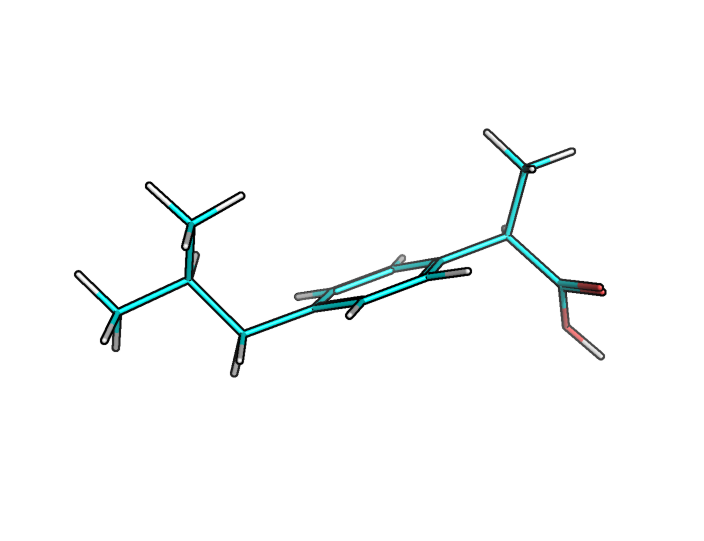

In [16]:
v.server.do('ray')
v.GetPNG()

Application of the force field has flattened our benzene ring as desired!

In [17]:
pickle.dump(ibuH, open('ibuH_opt.pkl','wb'))